### FXCM API
* https://fxcm.github.io/rest-api-docs

In [1]:
import fxcmpy
fxcmpy.__version__

'1.2.6'

In [2]:
api = fxcmpy.fxcmpy(config_file='/home/babel/Python/fxcm.cfg', server='real')

## Retrieving Tick Data

In [3]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [4]:
plt.style.use('seaborn')

In [5]:
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [6]:
#all available currency pairs

from fxcmpy import fxcmpy_tick_data_reader as tdr

In [7]:
print(tdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [8]:
#following code retrieves one weeks worth of tick data for EURUSD

start = dt.datetime(2020, 3, 30)  
stop = dt.datetime(2020, 4, 3)    

In [9]:
td = tdr('EURUSD', start, stop)   #retrieves data file, unpacks it and stores the raw data in DF

In [10]:
td.get_raw_data().info()    #return DF object with raw data (index values are str objects)

<class 'pandas.core.frame.DataFrame'>
Index: 2692289 entries, 03/29/2020 21:07:12.003 to 04/03/2020 20:58:18.847
Data columns (total 2 columns):
Bid    float64
Ask    float64
dtypes: float64(2)
memory usage: 61.6+ MB


In [11]:
td.get_data().info()    #return DF object for which the index has been transformed to a DatetimeIndex

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2692289 entries, 2020-03-29 21:07:12.003000 to 2020-04-03 20:58:18.847000
Data columns (total 2 columns):
Bid    float64
Ask    float64
dtypes: float64(2)
memory usage: 61.6 MB


In [12]:
td.get_data().head()

,Bid,Ask
2020-03-29 21:07:12.003,1.11177,1.11230
2020-03-29 21:07:12.497,1.11177,1.11233
2020-03-29 21:07:16.002,1.11177,1.11228
2020-03-29 21:07:16.003,1.11188,1.11228
2020-03-29 21:07:16.436,1.11188,1.11232


In [13]:
sub = td.get_data(start='2020-04-03 12:00:00', end='2020-04-03 12:15:00')  #picks a subset of data set

In [14]:
sub.head()

,Bid,Ask
2020-04-03 12:00:00.018,1.07888,1.07891
2020-04-03 12:00:00.081,1.07889,1.07891
2020-04-03 12:00:00.084,1.07889,1.07892
2020-04-03 12:00:00.098,1.07889,1.07893
2020-04-03 12:00:00.114,1.07889,1.07892


In [15]:
sub['Mid'] = sub.mean(axis=1)  #calculate the mid prices from the bid and ask prices

In [16]:
sub['SMA'] = sub['Mid'].rolling(1000).mean()  #derives SMA values over intervals of 10000 ticks

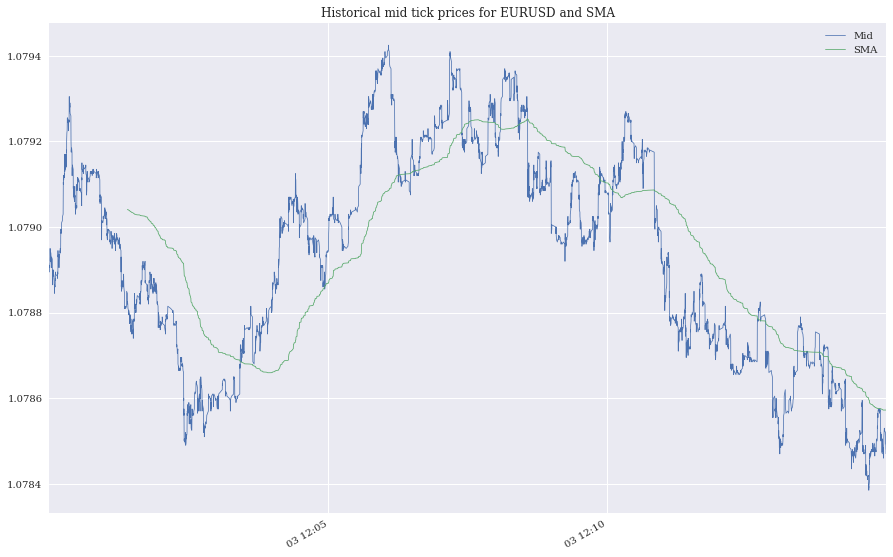

In [17]:
sub[['Mid', 'SMA']].plot(figsize=(15,10), lw=0.75);
plt.title('Historical mid tick prices for EURUSD and SMA',loc='center');

## Retrieving Candles Data

In [18]:
#available symbols for which candles data is provided:

from fxcmpy import fxcmpy_candles_data_reader as cdr

In [19]:
print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [20]:
start = dt.datetime(2020, 3, 30)  
stop = dt.datetime(2020, 4, 3)    

In [21]:
period = 'H1'

In [22]:
candles = cdr('EURUSD', start, stop, period)

In [23]:
data = candles.get_data()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2020-03-29 21:00:00 to 2020-04-03 20:00:00
Data columns (total 8 columns):
BidOpen     120 non-null float64
BidHigh     120 non-null float64
BidLow      120 non-null float64
BidClose    120 non-null float64
AskOpen     120 non-null float64
AskHigh     120 non-null float64
AskLow      120 non-null float64
AskClose    120 non-null float64
dtypes: float64(8)
memory usage: 8.4 KB


In [25]:
data[data.columns[:4]].tail()

,BidOpen,BidHigh,BidLow,BidClose
2020-04-03 16:00:00,1.07977,1.07981,1.07782,1.07871
2020-04-03 17:00:00,1.07871,1.08010,1.07820,1.07982
2020-04-03 18:00:00,1.07982,1.08161,1.07962,1.08106
2020-04-03 19:00:00,1.08106,1.08283,1.08081,1.08092
2020-04-03 20:00:00,1.08092,1.08169,1.08029,1.08063


In [26]:
data[data.columns[4:]].tail()

,AskOpen,AskHigh,AskLow,AskClose
2020-04-03 16:00:00,1.07980,1.07984,1.07785,1.07873
2020-04-03 17:00:00,1.07873,1.08013,1.07822,1.07985
2020-04-03 18:00:00,1.07985,1.08165,1.07964,1.08107
2020-04-03 19:00:00,1.08107,1.08285,1.08085,1.08097
2020-04-03 20:00:00,1.08097,1.08195,1.08038,1.08120


In [27]:
data['MidClose'] = data[['BidClose', 'AskClose']].mean(axis=1) #calculate the mid close prices from bid and ask

In [28]:
data['SMA10'] = data['MidClose'].rolling(10).mean()   #calculate two SMAs
data['SMA50'] = data['MidClose'].rolling(50).mean()   

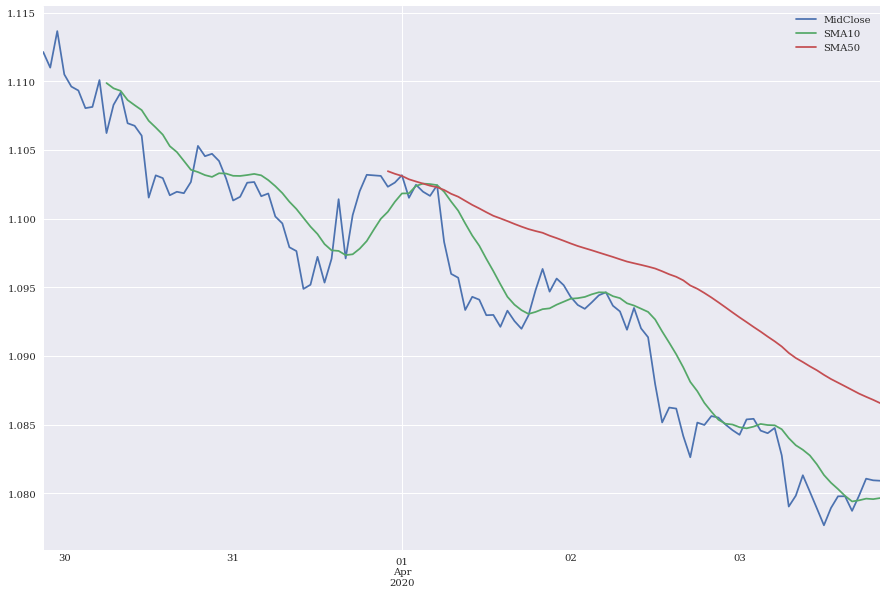

In [29]:
data[['MidClose', 'SMA10', 'SMA50']].plot(figsize=(15,10));

## Working with the API

In [ ]:
instruments = api.get_instruments()
instruments

In [ ]:
print(instruments)

In [ ]:
#retrieves the most recent m1 bar prices for EURUSD

candles = api.get_candles('EUR/USD', period='m1', number=250)

In [ ]:
candles['askclose'].plot(figsize=(15,10));

In [ ]:
#1
def output(data, dataframe):
    print('%3d | %s | %s | %6.5f, %6.5f' 
          % (len(dataframe), data['Symbol'],
             pd.to_datetime(int(data['Updated']), unit='ms'), 
             data['Rates'][0], data['Rates'][1]))

In [ ]:
#2
api.subscribe_market_data('EUR/USD', (output,))